In [5]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv("income.csv - income.csv.csv")

In [7]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

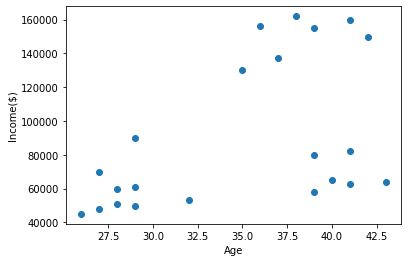

In [8]:
plt.scatter(df.Age,df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [10]:
kn= KMeans(n_clusters=3)
y_predicted = kn.fit_predict(df[["Age","Income($)"]])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [16]:
df["cluster"]=y_predicted
df.head()

,Name,Age,Income($),Cluster,cluster
0,Rob,27,70000,2,2
1,Michael,29,90000,2,2
2,Mohan,29,61000,0,0
3,Ismail,28,60000,0,0
4,Kory,42,150000,1,1


In [17]:
kn.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

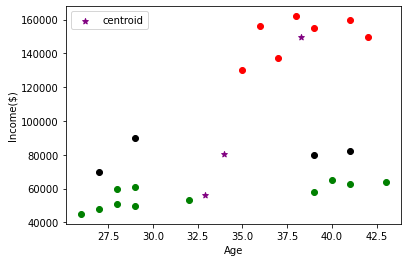

In [18]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="black")
plt.scatter(kn.cluster_centers_[:,0],kn.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

In [21]:
scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])

In [22]:
df.head()

,Name,Age,Income($),Cluster,cluster
0,Rob,0.058824,0.213675,2,2
1,Michael,0.176471,0.384615,2,2
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1


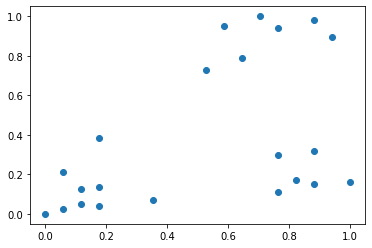

In [23]:
plt.scatter(df.Age,df["Income($)"])

In [24]:
kn= KMeans(n_clusters=3)
y_predicted = kn.fit_predict(df[["Age","Income($)"]])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [25]:
df["cluster"]=y_predicted
df.head()

,Name,Age,Income($),Cluster,cluster
0,Rob,0.058824,0.213675,2,1
1,Michael,0.176471,0.384615,2,1
2,Mohan,0.176471,0.136752,0,1
3,Ismail,0.117647,0.128205,0,1
4,Kory,0.941176,0.897436,1,2


In [26]:
kn.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

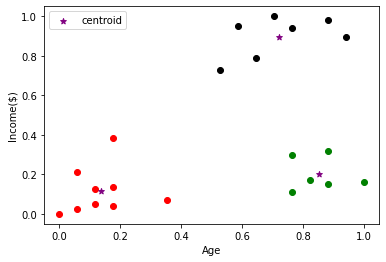

In [27]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1.Age,df1["Income($)"],color="green")
plt.scatter(df2.Age,df2["Income($)"],color="red")
plt.scatter(df3.Age,df3["Income($)"],color="black")
plt.scatter(kn.cluster_centers_[:,0],kn.cluster_centers_[:,1],color="purple",marker="*",label="centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()

In [29]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    kn=KMeans(n_clusters=k)
    kn.fit_predict(df[["Age","Income($)"]])
    sse.append(kn.inertia_)

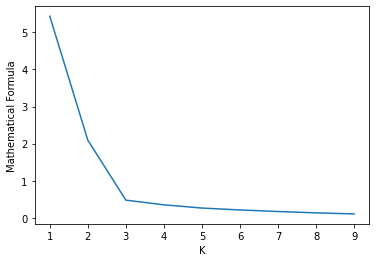

In [30]:
plt.xlabel("K")
plt.ylabel("Mathematical Formula")
plt.plot(k_rng,sse)